## Red neuronal recurente (RNN) - Series temporales

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
leche = pd.read_csv('produccion_leche.csv', index_col='Month')

In [5]:
leche.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [6]:
leche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6+ KB


In [7]:
leche.index = pd.to_datetime(leche.index)

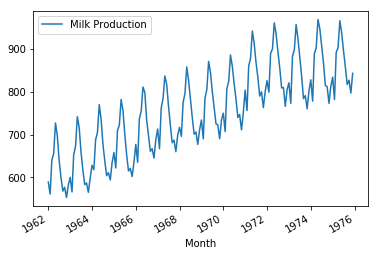

In [8]:
leche.plot()

In [9]:
conjunto_entrenamiento = leche.head(150)
conjunto_pruebas = leche.tail(18)

In [11]:
conjunto_pruebas

,Milk Production
Month,
1974-07-01 01:00:00,908.0
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0
1974-11-01 01:00:00,773.0
1974-12-01 01:00:00,813.0
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
entrenamiento_normalizado = normalizacion.fit_transform(conjunto_entrenamiento)
pruebas_normalizado = normalizacion.fit_transform(conjunto_pruebas)

In [14]:
pruebas_normalizado

array([[0.69948187],
       [0.48704663],
       [0.21761658],
       [0.20207254],
       [0.        ],
       [0.20725389],
       [0.31606218],
       [0.04663212],
       [0.61658031],
       [0.67357513],
       [1.        ],
       [0.84974093],
       [0.6373057 ],
       [0.44041451],
       [0.22797927],
       [0.27979275],
       [0.12435233],
       [0.3626943 ]])

In [16]:
def lotes(datos_entrenamiento, tamano_lote, pasos):
    comienzo = np.random.randint(0, len(datos_entrenamiento) - pasos)
    lote_y = np.array(datos_entrenamiento[comienzo:comienzo+pasos+1]).reshape(1,pasos+1)
    return lote_y[:, :-1].reshape(-1,pasos,1), lote_y[:,1:].reshape(-1,pasos,1)

In [17]:
numero_entradas = 1
numero_pasos = 18
numero_neuronas = 120
numero_salidas = 1
tasa_aprendizaje = 0.001
numero_iteracciones_entrenamiento = 5000
tamano_lote = 1

In [18]:
x = tf.placeholder(tf.float32, [None, numero_pasos, numero_entradas])
y = tf.placeholder(tf.float32, [None, numero_pasos, numero_salidas])

In [19]:
capa = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_units=numero_neuronas, activation=tf.nn.relu), output_size=numero_salidas)

In [21]:
salidas, estados = tf.nn.dynamic_rnn(capa, x, dtype=tf.float32)

In [22]:
funcion_error = tf.reduce_mean(tf.square(salidas-y))
optimizador = tf.train.AdamOptimizer(learning_rate=tasa_aprendizaje)
entrenamiento = optimizador.minimize(funcion_error)

In [23]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [30]:
with tf.Session() as session:
    session.run(init)
    for iteracion in range(numero_iteracciones_entrenamiento):
        lote_x, lote_y = lotes(entrenamiento_normalizado, tamano_lote, numero_pasos)
        session.run(entrenamiento, feed_dict={x:lote_x, y:lote_y})
        if iteracion % 100 == 0:
            error = funcion_error.eval(feed_dict={x:lote_x, y:lote_y})
            print(iteracion, "\t Error" , error)
            
        saver.save(session, "./modelo_series_temporales")

0 	 Error 0.16494468
100 	 Error 0.031524032
200 	 Error 0.023920579
300 	 Error 0.019040372
400 	 Error 0.009642428
500 	 Error 0.007004263
600 	 Error 0.0116552515
700 	 Error 0.0117379865
800 	 Error 0.005058706
900 	 Error 0.0044552456
1000 	 Error 0.00490291
1100 	 Error 0.0075170896
1200 	 Error 0.0052063293
1300 	 Error 0.008452643
1400 	 Error 0.005830342
1500 	 Error 0.0043931613
1600 	 Error 0.0045988807
1700 	 Error 0.0045127026
1800 	 Error 0.003637869
1900 	 Error 0.0048270696
2000 	 Error 0.006855473
2100 	 Error 0.006174561
2200 	 Error 0.0036250204
2300 	 Error 0.005622609
2400 	 Error 0.0029079998
2500 	 Error 0.0028524133
2600 	 Error 0.005872352
2700 	 Error 0.0043842397
2800 	 Error 0.003285868
2900 	 Error 0.00492491
3000 	 Error 0.004260557
3100 	 Error 0.0034660217
3200 	 Error 0.0016651179
3300 	 Error 0.0032490322
3400 	 Error 0.0029422045
3500 	 Error 0.0030846437
3600 	 Error 0.006784176
3700 	 Error 0.0026813676
3800 	 Error 0.0040272744
3900 	 Error 0.00192

In [31]:
conjunto_pruebas

,Milk Production
Month,
1974-07-01 01:00:00,908.0
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0
1974-11-01 01:00:00,773.0
1974-12-01 01:00:00,813.0
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0


In [35]:
with tf.Session() as session:
    saver.restore(session, "./modelo_series_temporales")
    entrenamiento_seed = list(entrenamiento_normalizado[-18:])
    for iteracion in range(18):
        lote_x = np.array(entrenamiento_seed[-numero_pasos:]).reshape(1,numero_pasos,1)
        prediccion_y = session.run(salidas, feed_dict={x:lote_x})
        entrenamiento_seed.append(prediccion_y[0,-1,0])

INFO:tensorflow:Restoring parameters from ./modelo_series_temporales


In [37]:
resultados = normalizacion.inverse_transform(np.array(entrenamiento_seed[18:]).reshape(18, 1))

In [38]:
resultados

array([[939.3315 ],
       [921.98553],
       [904.9166 ],
       [904.14526],
       [894.8093 ],
       [907.83673],
       [927.2401 ],
       [919.84045],
       [964.34357],
       [973.9    ],
       [980.0134 ],
       [966.7657 ],
       [951.65   ],
       [935.0187 ],
       [921.92664],
       [926.2259 ],
       [919.5597 ],
       [945.0179 ]], dtype=float32)

In [39]:
conjunto_pruebas['Predicciones'] = resultados

/home/vagrant/.conda/envs/my_env_tf_01/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
conjunto_pruebas

,Milk Production,Predicciones
Month,,
1974-07-01 01:00:00,908.0,939.331482
1974-08-01 01:00:00,867.0,921.985535
1974-09-01 01:00:00,815.0,904.916626
1974-10-01 01:00:00,812.0,904.145264
1974-11-01 01:00:00,773.0,894.809326
1974-12-01 01:00:00,813.0,907.836731
1975-01-01 01:00:00,834.0,927.240112
1975-02-01 01:00:00,782.0,919.840454
1975-03-01 01:00:00,892.0,964.343567


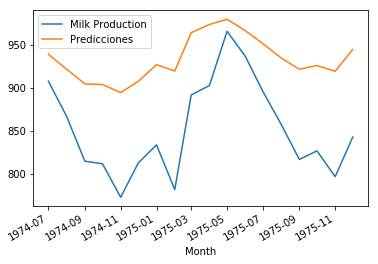

In [41]:
conjunto_pruebas.plot()